In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pickle

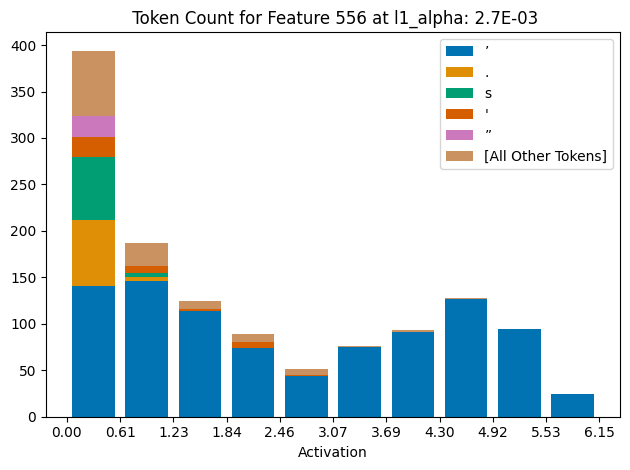

In [5]:
filename = "images/2.7E-03_556.pkl"
with open(filename, 'rb') as f:
    all_variables = pickle.load(f)
r, barWidth, bin_boundaries, data, title = all_variables
token_dict, misc_count, max_tokens, max_text = data
colors = sns.color_palette('colorblind', len(max_tokens) + 1)
running_sum = np.zeros(len(bin_boundaries) - 1)
for i in range(len(max_tokens)):
    token_id_name = max_tokens[i]
    token_count_array = token_dict[token_id_name]
    text_label = max_text[i]
    plt.bar(r, token_count_array, bottom=running_sum, label=text_label, color=colors[i], width=barWidth)
    running_sum += token_count_array
plt.bar(r, misc_count, bottom=running_sum, label='[All Other Tokens]', color=colors[-1], width=barWidth)
plt.title(title)
plt.xlabel('Activation')
plt.xticks(bin_boundaries, [f"{val:.2f}" for val in bin_boundaries])
plt.legend()
plt.tight_layout()
plt.show()

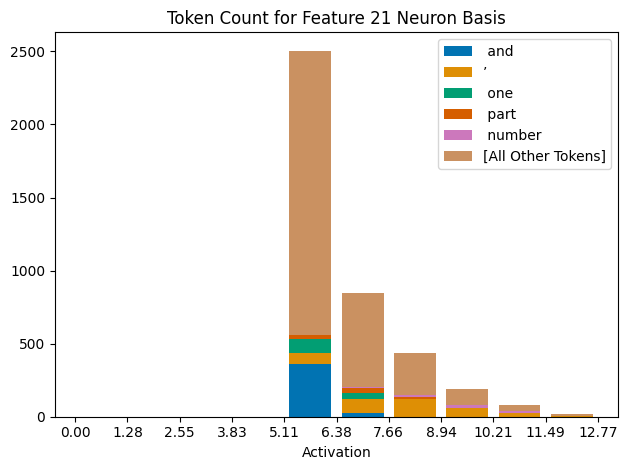

In [10]:
filename = "images/neuron_basis_21.pkl"
with open(filename, 'rb') as f:
    all_variables = pickle.load(f)
r, barWidth, bin_boundaries, data, title, counts = all_variables
token_dict, misc_count, max_tokens, max_text = data

# Counts has the count of activations for each bin. 
# I'd like to show a broken y-axis plot of the counts for the first 4 bins
colors = sns.color_palette('colorblind', len(max_tokens) + 1)
running_sum = np.zeros(len(bin_boundaries) - 1)
for i in range(len(max_tokens)):
    token_id_name = max_tokens[i]
    token_count_array = token_dict[token_id_name]
    text_label = max_text[i]
    plt.bar(r, token_count_array, bottom=running_sum, label=text_label, color=colors[i], width=barWidth)
    running_sum += token_count_array
plt.bar(r, misc_count, bottom=running_sum, label='[All Other Tokens]', color=colors[-1], width=barWidth)
plt.title(title)
plt.xlabel('Activation')
plt.xticks(bin_boundaries, [f"{val:.2f}" for val in bin_boundaries])
plt.legend()
plt.tight_layout()
plt.show()

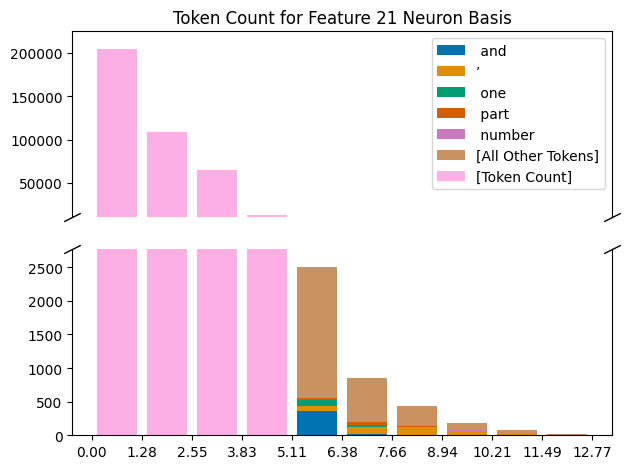

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns

filename = "images/neuron_basis_21.pkl"
with open(filename, 'rb') as f:
    all_variables = pickle.load(f)

r, barWidth, bin_boundaries, data, title, counts = all_variables
token_dict, misc_count, max_tokens, max_text = data

colors = sns.color_palette('colorblind', len(max_tokens) + 2)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)

# Define y-limits for the two subplots based on your data
lower_ylim = [0, 1.1 * counts[4]]
upper_ylim = [counts[3]*0.8, 1.1 * counts[0]]

# Plotting data on the two subplots
running_sum= np.zeros(len(bin_boundaries) - 1)
# running_sum_upper = np.zeros(len(bin_boundaries) - 1)

for i in range(len(max_tokens)):
    token_id_name = max_tokens[i]
    token_count_array = token_dict[token_id_name]
    text_label = max_text[i]

    ax1.bar(r, token_count_array, bottom=running_sum, label=text_label, color=colors[i], width=barWidth)
    ax2.bar(r, token_count_array, bottom=running_sum, label=text_label, color=colors[i], width=barWidth)
    running_sum += token_count_array
# misc_count[:4] += counts[4]
ax1.bar(r, misc_count, bottom=running_sum, label='[All Other Tokens]', color=colors[-2], width=barWidth)
ax2.bar(r, misc_count, bottom=running_sum, label='[All Other Tokens]', color=colors[-2], width=barWidth)
ax1.bar(r[:4],counts[:4], label='[Token Count]', color=colors[-1], width=barWidth)
ax2.bar(r[:4],counts[:4], label='[Token Count]', color=colors[-1], width=barWidth)
# ax2.bar(r[3:], misc_count[3:], bottom=running_sum_upper[3:], label='[All Other Tokens]', color=colors[-1], width=barWidth)

ax1.set_ylim(upper_ylim)
ax2.set_ylim(lower_ylim)

# Hide the spines between ax1 and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False, axis='x', which='both', bottom=False, top=False)
ax2.xaxis.tick_bottom()

# Draw the broken y-axis
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.set_xticks(bin_boundaries)
ax2.set_xticklabels([f"{val:.2f}" for val in bin_boundaries])
ax1.set_title(title)
ax1.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [ ]:
cou

(array([204240, 108233,  65095,  12819,   2518,    849,    438,    189,
            80,     19]),
 array([   0.,    0.,    0.,    0., 1949.,  644.,  288.,  112.,   40.,
          13.]))